# Navigation project

## 1. Models tested

We tried and trained different DQN parametrizations:
- simple DQN algo
- double DQN algo
- simple DQN algo with priority sampling

For each we tried to train with different set of parameters:
- simple DQN algo: epsilon decay for values [0.994, 0.995, 0.996, 0.997]
- double DQN algo: epsilon decay for values [0.994, 0.995, 0.996, 0.997]
- simple DQN algo with priority sampling: [prio_a x prio_b] for values [[0., 1.] x [0., 1.]] (0.1 steps)

### Notation

A Simple or Double DQN model will be identified by the following string: 
"[dqn_type]_[neural_network_fully_connected_hidden_layers]_[epsilon_decay]"

A priority sampling model will add "[prio_a]_[prio_b]"

For instance "simple_[32; 32]_0.994" designates a simple DQN algo, trained with a neural network composed of 2 hidden layers fully connected of 32 nodes each, using a epsilon decay every episode of 0.994

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import results_analysis

In [18]:
#Get results from 'results.csv'
#results_df: full dataframe of results
#solved_df: nb of episodes to reach 14 reward over last 100 episodes
#tops_df: fastest models to solve environment
results_df, solved_df, tops_df = results_analysis.get_results_df(tops_nb=5)

## 2. Fastest models

In [22]:
#print tops_df
display(tops_df)

,episode
model,
simple_[32; 32]_0.994,458
double_[64; 64; 64]_0.994,486
prio_[64; 64; 64]_0.997_0.1_0.2,489
simple_[64; 64]_0.994,490
prio_[64; 64; 64]_0.997_0.0_0.6,505


,simple_[32; 32]_0.994,double_[64; 64; 64]_0.994,prio_[64; 64; 64]_0.997_0.1_0.2,simple_[64; 64]_0.994,prio_[64; 64; 64]_0.997_0.0_0.6
100,1.00,1.18,0.56,1.15,0.67
200,5.36,4.72,3.07,4.64,3.94
300,9.05,8.23,6.99,8.01,7.03
400,12.15,11.19,10.00,11.42,10.97
500,14.00,14.00,14.00,14.00,13.74
600,14.00,14.00,14.00,14.00,14.00
700,14.00,14.00,14.00,14.00,14.00
800,14.00,14.00,14.00,14.00,14.00
900,14.00,14.00,14.00,14.00,14.00
1000,14.00,14.00,14.00,14.00,14.00


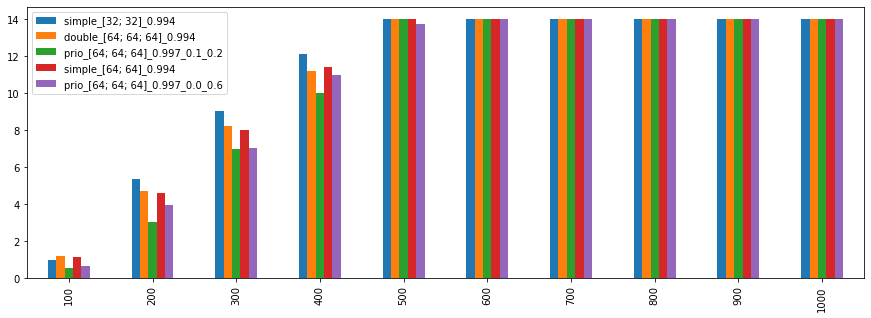

In [23]:
#Plot fastest models
results_analysis.plot_results(results_df, tops_df.index)

## 3. Per model type (simple, double, prio) 

,double,prio,simple
100,0.773125,0.5771,0.778125
200,3.898750,3.1329,3.547500
300,6.983750,6.3252,6.825625
400,9.484375,9.2583,9.476250
500,11.641875,11.9767,12.003750
600,12.973125,13.6625,13.166250
700,13.718125,13.9731,13.681875
800,13.885625,14.0000,13.873125
900,13.971250,14.0000,13.944375
1000,14.000000,14.0000,14.000000


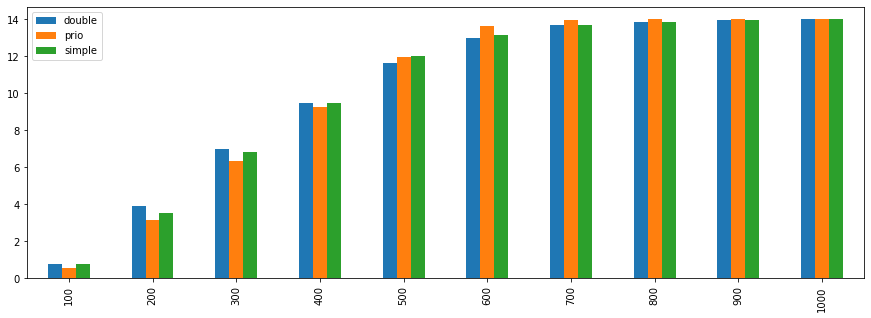

In [26]:
results_analysis.plot_results_per_model_type(results_df)

## Conclusion
All models perform comparably; I was not really able to identidy which one would be the best to use.
Still, I decided to select the simple_[32; 32]_0.994 model as it was the fastest one to train for me and it behaves reasonably well when tested in the banana environment

In [33]:
%run -i navigation.py test --test_params=best_params.json --test_model="simple_[64, 64, 64]_0.994"

Unexpected error: handle is closed


OSError: handle is closed

ERROR:root:Exception calling application: [WinError 232] The pipe is being closed
Traceback (most recent call last):
  File "C:\Users\Julien\Anaconda3\envs\myuda\lib\site-packages\grpc\_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "C:\Users\Julien\Anaconda3\envs\myuda\lib\site-packages\unityagents\rpc_communicator.py", line 25, in Exchange
    self.child_conn.send(request)
  File "C:\Users\Julien\Anaconda3\envs\myuda\lib\multiprocessing\connection.py", line 206, in send
    self._send_bytes(_ForkingPickler.dumps(obj))
  File "C:\Users\Julien\Anaconda3\envs\myuda\lib\multiprocessing\connection.py", line 280, in _send_bytes
    ov, err = _winapi.WriteFile(self._handle, buf, overlapped=True)
BrokenPipeError: [WinError 232] The pipe is being closed
